<a href="https://colab.research.google.com/drive/1JQDcfSdIb7XNiky6cp2K7vEBS2ZdpXNW#scrollTo=v5VdKgP2rfPq" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Machine (SVM)

## 1. Load dataset & import library

In [1]:
!gdown --folder https://drive.google.com/drive/folders/1FDfaBhqWEWhNKH0BX1S00_SU0CIZuvNj?usp=drive_link

Retrieving folder contents
Processing file 1CypV5NYf-l7CH6eovK-1rjOGNbqh8jEL X_test.csv
Processing file 1naM47Yz7se4z2161vHOGlsRPw0gZeLKd X_train.csv
Processing file 1GLNbaP-P-pDncjrz2UXT9IpH9k40Ht5G y_test.csv
Processing file 1DY3xGU4rcojDZGgNumddKqfLwgnBWJ1s y_train.csv
Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1CypV5NYf-l7CH6eovK-1rjOGNbqh8jEL
To: /content/dataset_ML/X_test.csv
100% 34.0M/34.0M [00:00<00:00, 84.5MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1naM47Yz7se4z2161vHOGlsRPw0gZeLKd
From (redirected): https://drive.google.com/uc?id=1naM47Yz7se4z2161vHOGlsRPw0gZeLKd&confirm=t&uuid=69b1fc06-54c7-43be-a09e-c76f9a52201d
To: /content/dataset_ML/X_train.csv
100% 136M/136M [00:01<00:00, 74.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1GLNbaP-P-pDncjrz2UXT9IpH9k40Ht5G
To: /content/dataset_ML/y_test.csv
100% 4.00k/4.00k [00:00<00:00, 

In [2]:
import os
import cv2 as cv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.svm import SVC
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import cvxpy as cvx # using convex optimisation
from collections import Counter

## 2. Load train/test data from CSV file

In [3]:
X_train = pd.read_csv('./dataset_ML/X_train.csv', header=None).values
y_train = pd.read_csv('./dataset_ML/y_train.csv', header=None).values
X_test = pd.read_csv('./dataset_ML/X_test.csv', header=None).values
y_test = pd.read_csv('./dataset_ML/y_test.csv', header=None).values
print(f'X_train.shape: {X_train.shape}, X_test.shape: {X_test.shape}')

X_train.shape: (3200, 3136), X_test.shape: (800, 3136)


## 3. Classification using SVM

Code utilizing the scikit-learn library and a source code version of the algorithm are prepared. In the source code, optimization methods and loss functions can be specified directly.

## SVM

### Source Code

In [4]:
# Support vector machines classifier with soft margin C=1 and rbf kernel
class SVMFromScratch:
    def __init__(self):
        pass


    def fit(self, X, y):
        X0 = X[np.where(y==0)[0]]
        X1 = X[np.where(y==1)[0]]

        y = y.reshape(-1, 1)

        w0 = cvx.Variable([1, 1])
        w = cvx.Variable([X.shape[1], 1])

        obj = cvx.Minimize(cvx.norm(w, 2)**2 / 2)
        constraints = [w0 + X0@w <= -1, w0 + X1@w >= 1]
        prob = cvx.Problem(obj, constraints)
        self.results = prob.solve()

        self.w0 = w0.value
        self.w = w.value


    def predict(self, X):
        return ((self.w0 + X@np.array(self.w)) >= 0).astype(int)

In [5]:
# takes a while...
svm = SVMFromScratch()
svm.fit(X_train, y_train)

In [6]:
svm.w0

array([[6.19176855]])

In [7]:
y_pred = svm.predict(X_test).reshape(-1)

In [8]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       597
         1.0       1.00      1.00      1.00       203

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800



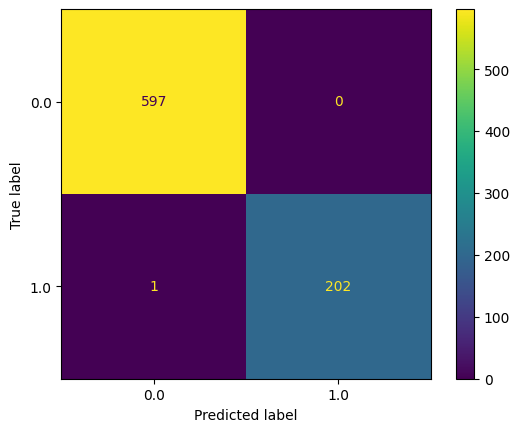

In [9]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

### SVM algorithm using scikit-learn

In [10]:
clf_svc = SVC(kernel='poly')
clf_svc.fit(X_train, y_train)
y_pred = clf_svc.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [11]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       597
         1.0       1.00      1.00      1.00       203

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800



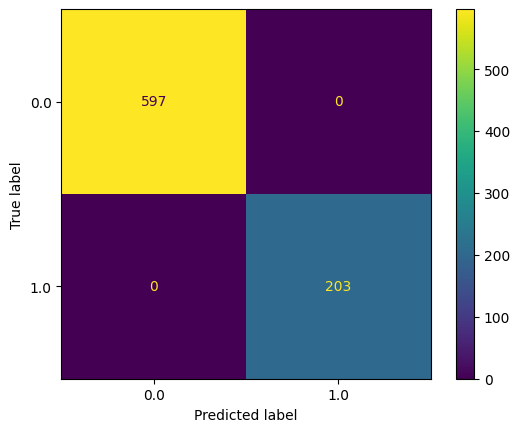

In [12]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()